In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
cols = [9,10,11,12]
df = pd.read_csv('../../data/230118_mj1.csv',usecols = cols)
df

,Roll,Pitch,Yaw,Time
0,0.86,-0.70,-1.65,0.0008
1,0.85,-0.71,-1.65,0.0011
2,0.86,-0.70,-1.67,0.0013
3,0.88,-0.69,-1.66,0.0015
4,0.87,-0.70,-1.65,0.0018
...,...,...,...,...
1378,1.16,0.02,-2.78,21.7159
1379,1.13,-0.04,-2.67,21.7897
1380,0.61,-0.75,-2.16,21.8634
1381,1.54,0.03,-2.66,21.9331


### Q1,Q3,IQR 값 구하기

In [5]:
q3 = df['Roll'].quantile(0.75) 
q1 = df['Roll'].quantile(0.25)
iqr = q3 - q1
print(q3,q1)

1.24 1.06


### 이상치 여부 찾아 새로운 열로 저장

In [7]:
def is_outlier(df):
    roll = df['Roll']
    if roll > q3 + 1.5 * iqr or roll < q1 - 1.5 * iqr:
        return True
    else:
        return False

df['Roll_outlier'] = df.apply(is_outlier, axis = 1) # axis = 1 지정 필수
df

,Roll,Pitch,Yaw,Time,Roll_outlier
0,0.86,-0.70,-1.65,0.0008,False
1,0.85,-0.71,-1.65,0.0011,False
2,0.86,-0.70,-1.67,0.0013,False
3,0.88,-0.69,-1.66,0.0015,False
4,0.87,-0.70,-1.65,0.0018,False
...,...,...,...,...,...
1378,1.16,0.02,-2.78,21.7159,False
1379,1.13,-0.04,-2.67,21.7897,False
1380,0.61,-0.75,-2.16,21.8634,True
1381,1.54,0.03,-2.66,21.9331,True


### 이상치 행 제거

In [8]:
df_trim = df.loc[df['Roll_outlier'] == False]

del df_trim['Roll_outlier']

df_trim

,Roll,Pitch,Yaw,Time
0,0.86,-0.70,-1.65,0.0008
1,0.85,-0.71,-1.65,0.0011
2,0.86,-0.70,-1.67,0.0013
3,0.88,-0.69,-1.66,0.0015
4,0.87,-0.70,-1.65,0.0018
...,...,...,...,...
1372,1.39,0.00,-2.32,21.2777
1377,0.87,-0.49,-2.38,21.6423
1378,1.16,0.02,-2.78,21.7159
1379,1.13,-0.04,-2.67,21.7897


In [9]:
import matplotlib.pyplot as plt

def draw_plot(df, name):
    x = df['Time']
    
    f, axes = plt.subplots(3,1)
    # 격자 크기 설정
    f.set_size_inches((10, 10))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    plt.title(name + "'s Gait")

    axes[0].plot(x, df['Roll'])
    axes[0].set_title('Roll')
    
    axes[1].plot(x, df['Pitch'])
    axes[1].set_title('Pitch')

    axes[2].plot(x, df['Yaw'])
    axes[2].set_title('Yaw')

    plt.show()

### 이상치 제거 전

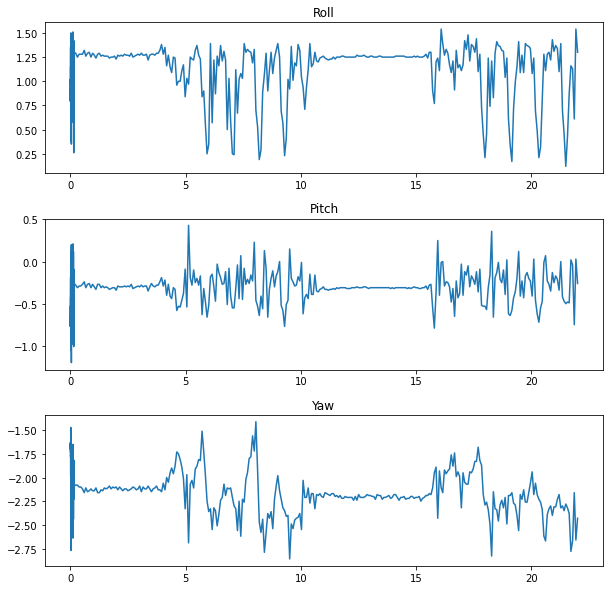

In [10]:
draw_plot(df, "z")

### 이상치 제거 후

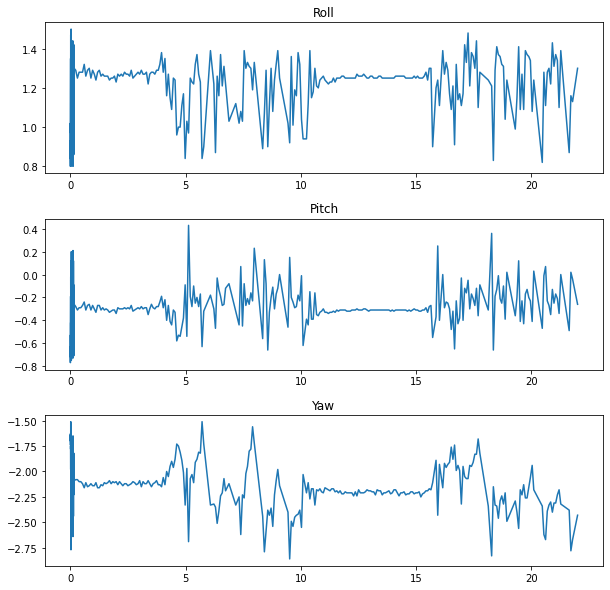

In [11]:
draw_plot(df_trim, "z")